<a href="https://colab.research.google.com/github/NahianAlindo/ml_practice/blob/master/Iris_nn_final_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,[0,2]].T
y = data.target
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y = lb.fit_transform(y)
Y = Y.T
print(X.shape)
print(Y.shape)
type(data)

(2, 150)
(3, 150)


sklearn.utils.Bunch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
def weights_init(layer_dims,init_type='he_normal',seed=0):

    np.random.seed(seed)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    if  init_type == 'he_normal':
        for l in range(1, L):
            parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
            parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))
            
    return parameters

In [ ]:

def ReLU(X,alpha=0,derivative=False):
    # Compute ReLU function and derivative
    X = np.array(X,dtype=np.float64)
    if derivative == False:
        return np.where(X<0,alpha*X,X)
    elif derivative == True:
        X_relu = np.ones_like(X,dtype=np.float64)
        X_relu[X < 0] = alpha
        return X_relu
    
def softmax(X):
    # Compute softmax values for each sets of scores in x.
    return np.exp(X) / np.sum(np.exp(X),axis=0)

In [ ]:
def weights_init(layer_dims,init_type='he_normal',seed=None):
        np.random.seed(seed)
        parameters = {}
        opt_parameters = {}
        L = len(layer_dims)            # number of layers in the network
        if  init_type == 'he_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))  
        
        return parameters

In [ ]:
def forward_propagation(X, hidden_layers,parameters,keep_proba=1,seed=None):
    if seed != None:
        np.random.seed(seed)
    caches = []
    A = X
    L = len(hidden_layers)
    for l,active_function in enumerate(hidden_layers,start=1):
        A_prev = A 
        
        Z = np.dot(parameters['W' + str(l)],A_prev)+parameters['b' + str(l)]
        
        if active_function == "relu":
            A = ReLU(Z)
        elif active_function == "softmax":
            A = softmax(Z)
            
        if keep_proba != 1 and l != L and l != 1:
            D = np.random.rand(A.shape[0],A.shape[1])
            D = (D<keep_prob)
            A = np.multiply(A,D)
            A = A / keep_prob
            cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)],D), Z)
            caches.append(cache_temp)
        else:
            cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)]), Z)
            #print(A.shape)
            caches.append(cache)
            
    return A, caches

In [ ]:
def compute_cost(A, Y, parameters, lamda=0,penality=None):
    m = Y.shape[1]
    
    cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
    
    L = len(parameters)//2
    
    if penality == 'l2' and lamda != 0:
        sum_weights = 0
        for l in range(1, L):
            sum_weights = sum_weights + np.sum(np.square(parameters['W' + str(l)]))
        cost = cost + sum_weights * (lambd/(2*m))
    elif penality == 'l1' and lamda != 0:
        sum_weights = 0
        for l in range(1, L):
            sum_weights = sum_weights + np.sum(np.abs(parameters['W' + str(l)]))
        cost = cost + sum_weights * (lambd/(2*m))
    
    return cost

In [ ]:
def back_propagation(AL, Y, caches, hidden_layers, keep_prob=1, penality=None,lamda=0):
    
    grads = {}
    L = len(caches) # the number of layers
    
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
    dZL = AL - Y
    
    cache = caches[L-1]
    linear_cache, activation_cache = cache
    AL, W, b = linear_cache
    grads["dW" + str(L)] = np.dot(dZL,AL.T)/m
    grads["db" + str(L)] = np.sum(dZL,axis=1,keepdims=True)/m
    grads["dA" + str(L-1)] = np.dot(W.T,dZL)
    
    
    # Loop from l=L-2 to l=0
    v_dropout = 0
    for l in reversed(range(L-1)):
        cache = caches[l]
        active_function = hidden_layers[l]
        
        linear_cache, Z = cache
        
            
        m = A_prev.shape[1]
        
        if keep_prob != 1 and v_dropout == 1:
            dA_prev = np.multiply(grads["dA" + str(l + 1)],D)
            dA_prev = dA_prev/keep_prob
            v_dropout = 0
        else:
            dA_prev = grads["dA" + str(l + 1)]
            v_dropout = 0
            
        
        if active_function == "relu":
            dZ = np.multiply(dA_prev,ReLU(Z,derivative=True))
        
            
            
        grads["dA" + str(l)] = np.dot(W.T,dZ)
        
        if penality == 'l2':
            grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lambd * W)/m)
        elif penality == 'l1':
            grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lambd * np.sign(W+10**-8))/m)
        else:
            grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)
            
        grads["db" + str(l + 1)] = np.sum(dZ,axis=1,keepdims=True)/m
        
        
    return grads

In [ ]:
def update_parameters(parameters, grads,learning_rate,iter_no,method = 'ADAM',opt_params=None,beta1=0.9,beta2=0.999):
    
    L = len(parameters) // 2 # number of layers in the neural network
    
    if method == 'ADAM':
        for l in range(L):
            opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
            opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
            opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + (1-beta2)*np.square(grads["db" + str(l + 1)])
            opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + (1-beta2)*np.square(grads["dW" + str(l + 1)])
            
            learningrate = learning_rate * np.sqrt((1-beta2**iter_no)/((1-beta1**iter_no)+10**-8))
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdw'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdb'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        
    return parameters,opt_parameters


In [ ]:
def predict(parameters, X,hidden_layers,return_prob=False):
    
    A, cache = forward_propagation(X,hidden_layers,parameters,seed=3)
    if return_prob == True:
        return A
    else:
        return np.argmax(A, axis=0)

In [ ]:
class DNNClassifier(object):

    
    def __init__(self,layer_dims,hidden_layers,init_type='he_normal',learning_rate=0.1, optimization_method = 'ADAM',batch_size=64,max_epoch=100,tolarance = 0.00001, keep_proba=1,penality=None,lamda=0,beta1=0.9, beta2=0.999,seed=None,verbose=0):
        self.layer_dims = layer_dims
        self.hidden_layers = hidden_layers
        self.init_type = init_type
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.batch_size = batch_size
        self.keep_proba = keep_proba
        self.penality = penality
        self.lamda = lamda
        self.beta1 = beta1
        self.beta2 = beta2
        self.seed = seed
        self.max_epoch = max_epoch
        self.tol = tolarance
        self.verbose = verbose

    @staticmethod
    def weights_init(layer_dims,init_type='he_normal',seed=None):
        
        np.random.seed(seed)
        parameters = {}
        opt_parameters = {}
        L = len(layer_dims)            # number of layers in the network
        if  init_type == 'he_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))  
        
        return parameters
    
    @staticmethod
    def sigmoid(X,derivative=False):
        '''Compute Sigmaoid and its derivative'''
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    @staticmethod
    def ReLU(X,alpha=0,derivative=False):
        '''Compute ReLU function and derivative'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*X,X)
        elif derivative == True:
            X_relu = np.ones_like(X,dtype=np.float64)
            X_relu[X < 0] = alpha
            return X_relu
    
    @staticmethod
    def softmax(X):
        return np.exp(X) / np.sum(np.exp(X),axis=0)
    @staticmethod
    def forward_propagation(X, hidden_layers,parameters,keep_prob=1,seed=None):
    
        if seed != None:
            np.random.seed(seed)
        caches = []
        A = X
        L = len(hidden_layers)
        for l,active_function in enumerate(hidden_layers,start=1):
            A_prev = A 
        
            Z = np.dot(parameters['W' + str(l)],A_prev)+parameters['b' + str(l)]
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    A = DNNClassifier.ReLU(Z,active_function[1])

            else:
                if active_function == "sigmoid":
                    A = DNNClassifier.sigmoid(Z)
                    A = DNNClassifier.Tanh(Z)
                elif active_function == "softmax":
                    A = DNNClassifier.softmax(Z)
                elif  active_function == "relu":
                    A = DNNClassifier.ReLU(Z)
                
            
            if keep_prob != 1 and l != L and l != 1:
                D = np.random.rand(A.shape[0],A.shape[1])
                D = (D<keep_prob)
                A = np.multiply(A,D)
                A = A / keep_prob
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)],D), Z)
                caches.append(cache)
            else:
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)]), Z)
                #print(A.shape)
                caches.append(cache)      
        return A, caches

    @staticmethod
    def compute_cost(A, Y, parameters, lamda=0,penality=None):

        m = Y.shape[1]
    
        cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
    
        L = len(parameters)//2
    
        if penality == 'l2' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.square(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        elif penality == 'l1' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.abs(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        return cost
    @staticmethod
    def back_propagation(AL, Y, caches, hidden_layers, keep_prob=1, penality=None,lamda=0):

        grads = {}
        L = len(caches) # the number of layers
    
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)
    
        # Initializing the backpropagation
        dZL = AL - Y
    
        cache = caches[L-1]
        linear_cache, activation_cache = cache
        AL, W, b = linear_cache
        grads["dW" + str(L)] = np.dot(dZL,AL.T)/m
        grads["db" + str(L)] = np.sum(dZL,axis=1,keepdims=True)/m
        grads["dA" + str(L-1)] = np.dot(W.T,dZL)
    
    
        # Loop from l=L-2 to l=0
        v_dropout = 0
        for l in reversed(range(L-1)):
            cache = caches[l]
            active_function = hidden_layers[l]
        
            linear_cache, Z = cache
            try:
                A_prev, W, b = linear_cache
            except:
                A_prev, W, b, D = linear_cache
                v_dropout = 1
            
            m = A_prev.shape[1]
        
            if keep_prob != 1 and v_dropout == 1:
                dA_prev = np.multiply(grads["dA" + str(l + 1)],D)
                dA_prev = dA_prev/keep_prob
                v_dropout = 0
            else:
                dA_prev = grads["dA" + str(l + 1)]
                v_dropout = 0
            
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,active_function[1],derivative=True))
                
            else:
                if active_function == "sigmoid":
                    dZ = np.multiply(dA_prev,DNNClassifier.sigmoid(Z,derivative=True))
                elif active_function == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,derivative=True))
                
            
            grads["dA" + str(l)] = np.dot(W.T,dZ)
        
            if penality == 'l2':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * W)/m)
            elif penality == 'l1':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * np.sign(W+10**-8))/m)
            else:
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)
            
            grads["db" + str(l + 1)] = np.sum(dZ,axis=1,keepdims=True)/m   
        return grads
    
    @staticmethod
    def update_parameters(parameters, grads,learning_rate,iter_no,method = 'ADAM',opt_parameters=None,beta1=0.9,beta2=0.999):
    
        L = len(parameters) // 2 # number of layers in the neural network
        
        if method == 'ADAM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                                  (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                                   (1-beta2)*np.square(grads["dW" + str(l + 1)])
            
                learning_rate = learning_rate * np.sqrt((1-beta2**iter_no)/((1-beta1**iter_no)+10**-8))
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdw'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdb'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        
        return parameters,opt_parameters
    
    def fit(self,X,y):
    
        # X -- data, numpy array of shape (input size, number of examples)
        # y -- lables, numpy array of shape (no of classes,n)
        
        np.random.seed(self.seed)
        self.grads = {}
        self.costs = []
        M = X.shape[1]
        opt_parameters = {}
        
        if self.verbose == 1:
            print('Initilizing Weights...')
        self.parameters = self.weights_init(self.layer_dims,self.init_type,self.seed)
        self.iter_no = 0
        idx = np.arange(0,M)
        
        if self.optimization_method == 'ADAM':
            for l in range(1, len(self.layer_dims)):
                opt_parameters['vdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['vdb' + str(l)] = np.zeros((self.layer_dims[l], 1))
                opt_parameters['sdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['sdb' + str(l)] = np.zeros((self.layer_dims[l], 1)) 
        
        if self.verbose == 1:
            print('Starting Training...')
            
        for epoch_no in range(1,self.max_epoch+1):
            np.random.shuffle(idx)
            X = X[:,idx]
            y = y[:,idx]
            for i in range(0,M, self.batch_size):
                self.iter_no = self.iter_no + 1
                X_batch = X[:,i:i + self.batch_size]
                y_batch = y[:,i:i + self.batch_size]
                # Forward propagation:
                AL, cache = self.forward_propagation(X_batch,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
                #cost
                cost = self.compute_cost(AL, y_batch, self.parameters,self.lamda,self.penality)
                self.costs.append(cost)
                
                if self.tol != None:
                    try:
                        if abs(cost - self.costs[-2]) < self.tol:
                            return self
                    except:
                        pass
                #back prop
                grads = self.back_propagation(AL, y_batch, cache,self.hidden_layers,self.keep_proba,self.penality,self.lamda)
                
                #update params
                self.parameters,opt_parameters = self.update_parameters(self.parameters,grads,self.learning_rate,self.iter_no-1, self.optimization_method, opt_parameters,self.beta1,self.beta2)
                
                if self.verbose == 1:
                    if self.iter_no % 100 == 0:
                        print("Cost after iteration {}: {}".format(self.iter_no, cost))
                
        return self
    def predict(self,X,proba=False):
        
        out, _ = self.forward_propagation(X,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
        if proba == True:
            return out.T
        else:
            return np.argmax(out, axis=0)

Initilizing Weights...
Starting Training...
Cost after iteration 100: 0.24044242981276165
Cost after iteration 200: 0.13173790801353347
Cost after iteration 300: 0.36714130072332307
Cost after iteration 400: 0.08337638005359382
Cost after iteration 500: 0.06692498137469491
Cost after iteration 600: 0.19725000844861257
Cost after iteration 700: 0.13124079155042723
Cost after iteration 800: 0.08254301743188922
Cost after iteration 900: 0.013122700134214162
Cost after iteration 1000: 0.12080547413685733
Cost after iteration 1100: 0.09068305580221939
Cost after iteration 1200: 0.13266687531365773
Cost after iteration 1300: 0.05202275267524707
Cost after iteration 1400: 0.14911181877180446
Cost after iteration 1500: 0.08502168133890305
Cost after iteration 1600: 0.09999709244703478
Cost after iteration 1700: 0.05815314847486572
Cost after iteration 1800: 0.06276277739541632
Cost after iteration 1900: 0.06343755037678266
Cost after iteration 2000: 0.03170467671298373
Cost after iteration 210

Text(0.5, 1.0, 'Decision Boundaries')

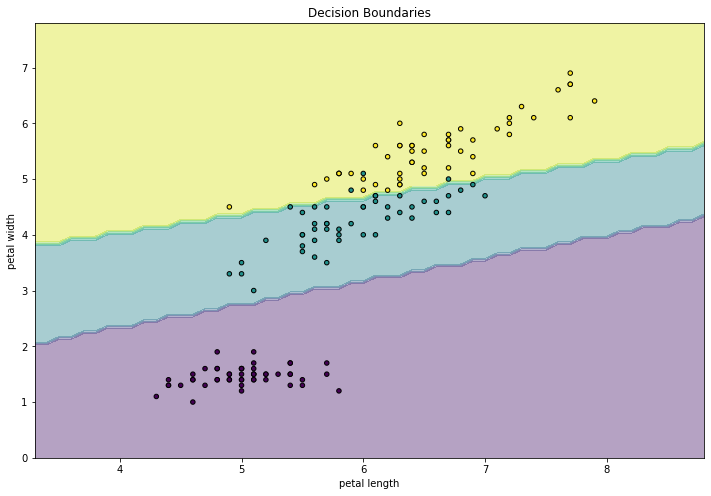

In [ ]:
model = DNNClassifier(layer_dims=[X.shape[0], 6, 4, 3],hidden_layers=[('relu',0),('relu',0.001),'softmax'],
                      optimization_method='ADAM',tolarance=None,max_epoch=900,verbose=1,seed=15)
model.fit(X,Y)
y_pred = model.predict(X,proba=False)
print(y_pred)

%matplotlib inline
import matplotlib.pyplot as plt
dt = data.data[:,[0,2]]
x_min, x_max = dt[:, 0].min() - 1, dt[:, 0].max() + 1
y_min, y_max = dt[:, 1].min() - 1, dt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# orediction
Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T) 

# Plot result
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z,alpha=0.4)
#plt.axis('off')
plt.scatter(dt[:, 0], dt[:, 1], c=y,s=20, edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Decision Boundaries')